In [72]:
import pandas as pd
import numpy as np

# Add the indicator to the stock

In [73]:
import sys
sys.path.insert(0, ".")
from spf.factor.ta.ta_factor_construction import populateindicators

In [74]:
tsla_price_data = pd.read_csv("data/prepared/tsla_data.csv")

In [75]:
tsla_price_data_with_fea = populateindicators(tsla_price_data)

In [76]:
tsla_price_data_with_fea = tsla_price_data_with_fea.dropna()

In [77]:
tsla_price_data_with_fea.shape

(3632, 34)

In [78]:
tsla_price_data_with_fea.info

<bound method DataFrame.info of                  Datetime        open        high         low       close  \
58    2024-02-16 14:30:00  200.850494  201.369995  199.100006  200.399994   
59    2024-02-16 15:00:00  200.419998  200.800003  199.809998  200.089996   
60    2024-02-16 15:30:00  200.089996  200.224396  199.320007  199.940002   
61    2024-02-16 16:00:00  200.089996  200.224396  199.320007  199.940002   
62    2024-02-16 16:30:00  200.089996  200.224396  199.320007  199.940002   
...                   ...         ...         ...         ...         ...   
3685  2024-05-02 04:00:00  182.860001  184.600006  178.352997  178.389999   
3686  2024-05-02 04:30:00  182.860001  184.600006  178.352997  178.389999   
3687  2024-05-02 05:00:00  182.860001  184.600006  178.352997  178.389999   
3688  2024-05-02 05:30:00  182.860001  184.600006  178.352997  178.389999   
3689  2024-05-02 06:00:00  182.860001  184.600006  178.352997  178.389999   

          volume  sentscore   sema_high   f

In [79]:
import matplotlib.pyplot as plt

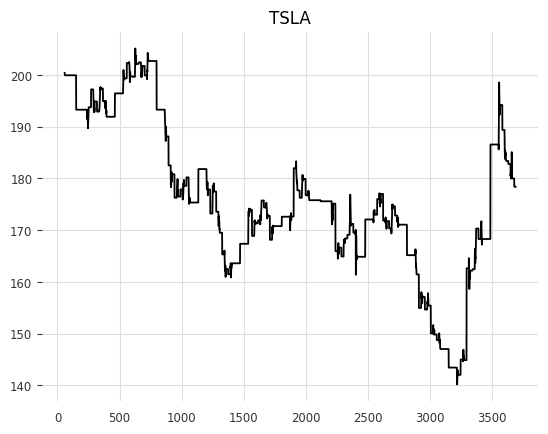

In [80]:
tsla_price_data_with_fea['close'].plot()
plt.title("TSLA")
plt.show()

# Stationarity and detrending

## ADF test

ADF test is used to determine the presence of unit root in the series, and hence helps in understand if the series is stationary or not. The null and alternate hypothesis of this test are:

- Null Hypothesis: The series has a unit root.

- Alternate Hypothesis: The series has no unit root.

If the null hypothesis in failed to be rejected, this test may provide evidence that the series is non-stationary.

In [81]:
from statsmodels.tsa.stattools import adfuller

In [82]:
def adf_test(timeseries, cutoff):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
    if dfoutput['p-value'] < cutoff:
        print(' The series ' + timeseries.name +' is likely stationary.')
    else:
        print(' The series ' + timeseries.name +' is likely non-stationary.')

In [83]:
adf_test(tsla_price_data_with_fea['close'],0.05)

Results of Dickey-Fuller Test:
Test Statistic                   -2.001686
p-value                           0.285835
#Lags Used                        0.000000
Number of Observations Used    3631.000000
Critical Value (1%)              -3.432152
Critical Value (5%)              -2.862336
Critical Value (10%)             -2.567194
dtype: float64
 The series close is likely non-stationary.


# Detrending by Differencing

It is one of the simplest methods for detrending a time series. A new series is constructed where the value at the current time step is calculated as the difference between the original observation and the observation at the previous time step.

In [84]:
tsla_price_data_with_fea['return']=tsla_price_data_with_fea['close'].pct_change()

/var/folders/9n/z7_nk6t566n7b9p2p69hmjyh0000gq/T/ipykernel_21739/1589998020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_price_data_with_fea['return']=tsla_price_data_with_fea['close'].pct_change()


In [85]:
tsla_price_data_with_fea.shape

(3632, 35)

In [86]:
tsla_price_data_with_fea = tsla_price_data_with_fea.dropna()

In [87]:
tsla_price_data_with_fea.shape

(3631, 35)

In [88]:
adf_test(tsla_price_data_with_fea['return'],0.05)

Results of Dickey-Fuller Test:
Test Statistic                  -59.381557
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    3630.000000
Critical Value (1%)              -3.432153
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64
 The series return is likely stationary.


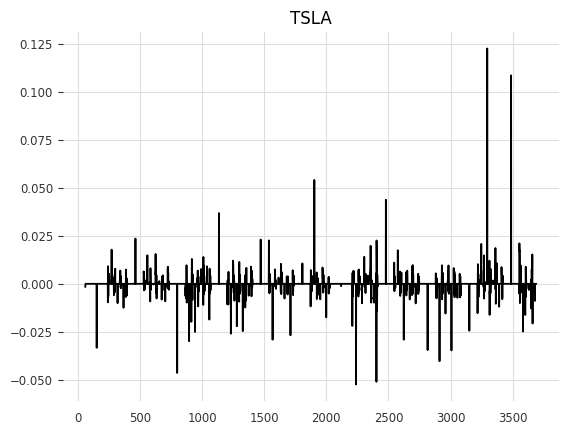

In [89]:
tsla_price_data_with_fea['return'].plot()
plt.title("TSLA")
plt.show()

In [90]:
tsla_price_data_with_fea.info

<bound method DataFrame.info of                  Datetime        open        high         low       close  \
59    2024-02-16 15:00:00  200.419998  200.800003  199.809998  200.089996   
60    2024-02-16 15:30:00  200.089996  200.224396  199.320007  199.940002   
61    2024-02-16 16:00:00  200.089996  200.224396  199.320007  199.940002   
62    2024-02-16 16:30:00  200.089996  200.224396  199.320007  199.940002   
63    2024-02-16 17:00:00  200.089996  200.224396  199.320007  199.940002   
...                   ...         ...         ...         ...         ...   
3685  2024-05-02 04:00:00  182.860001  184.600006  178.352997  178.389999   
3686  2024-05-02 04:30:00  182.860001  184.600006  178.352997  178.389999   
3687  2024-05-02 05:00:00  182.860001  184.600006  178.352997  178.389999   
3688  2024-05-02 05:30:00  182.860001  184.600006  178.352997  178.389999   
3689  2024-05-02 06:00:00  182.860001  184.600006  178.352997  178.389999   

          volume  sentscore   sema_high   f

In [91]:
tsla_price_data_with_fea=tsla_price_data_with_fea.drop(columns=['close','open','high','low'])

In [92]:
tsla_price_data_with_fea.shape

(3631, 31)

# Feature importance

In [93]:
from darts import TimeSeries,concatenate
from darts.dataprocessing.transformers import Scaler
from darts.models import TFTModel, MovingAverageFilter
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.utils.likelihood_models import QuantileRegression

In [23]:
#tsla_price_data_with_fea.index = pd.RangeIndex(start=1, stop=len(tsla_price_data_with_fea) + 1, step=1)

In [24]:
#tsla_price_data_with_fea.index

In [25]:
# tsla_price_data_return = tsla_price_data_with_fea[['Datetime','return']]
# tsla_price_data_past_covar = tsla_price_data_with_fea.drop(['return'], axis=1)
#tsla_price_data_static_covar = tsla_price_data_with_fea[['Datetime','sentscore']]

In [26]:
# tsla_price_data_return.head(5)

In [27]:
# tsla_price_data_past_covar.head(5)

In [28]:
#tsla_price_data_static_covar.head(5)

In [97]:
tsla_price_data_with_fea_ts = TimeSeries.from_dataframe(tsla_price_data_with_fea,
                                                      time_col='Datetime',
                                                      fill_missing_dates=True,
                                                      #fillna_value=0,
                                                      freq='30min'
                                                     )

In [98]:
tsla_price_data_with_fea_ts.columns

Index(['volume', 'sentscore', 'sema_high', 'fema_high', 'ema_close', 'ema_low',
       'dema', 'macdsignal', 'macdhist', 'ultosc', 'mfi', 'adx', 'adxr', 'cci',
       'rsi2', 'rocr', 'plus_di', 'minus_di', 'mom', 'beta', 'correl', 'var',
       'linearreg_angle', 'linear_slope', 'bb_lowerband', 'bb_upperband',
       'bb_middleband', 'adosc', 'natr', 'return'],
      dtype='object', name='component')

<Axes: xlabel='Datetime'>

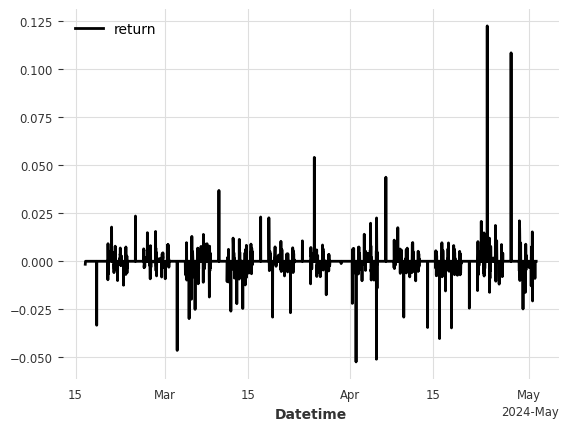

In [99]:
tsla_price_data_with_fea_ts['return'].plot()

In [100]:
tsla_price_data_return_ts = tsla_price_data_with_fea_ts['return']
tsla_price_data_past_covar_ts = tsla_price_data_with_fea_ts[['volume','sema_high', 'fema_high', 'ema_close', 'ema_low',
       'dema', 'macdsignal', 'macdhist', 'ultosc', 'mfi', 'adx', 'adxr', 'cci',
       'rsi2', 'rocr', 'plus_di', 'minus_di', 'mom', 'beta', 'correl', 'var',
       'linearreg_angle', 'linear_slope', 'bb_lowerband', 'bb_upperband',
       'bb_middleband', 'adosc', 'natr']]

<Axes: xlabel='Datetime'>

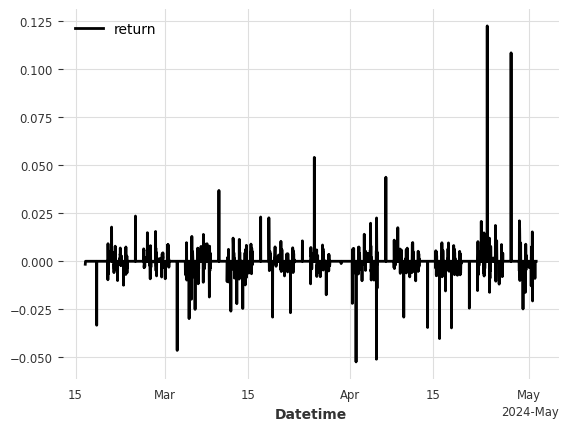

In [101]:
tsla_price_data_return_ts.plot()

## Smoothing data

In [102]:
# moving = MovingAverageFilter(window=15)
# tsla_smooth_data_return_ts = moving.filter(tsla_price_data_return_ts)
# tsla_smooth_data_return_ts.plot()
tsla_smooth_data_return_ts = tsla_price_data_return_ts

In [103]:
# moving_past_variate = MovingAverageFilter(window=15)
# tsla_smooth_data_past_covar_ts = moving_past_variate.filter(tsla_price_data_past_covar_ts)
# tsla_smooth_data_past_covar_ts.plot()
tsla_smooth_data_past_covar_ts = tsla_price_data_past_covar_ts

In [104]:
#tsla_smooth_data_static_covar_ts = tsla_price_data_static_covar_ts

In [105]:
tsla_smooth_data_return_ts = tsla_smooth_data_return_ts.astype(np.float32)
tsla_smooth_data_past_covar_ts = tsla_smooth_data_past_covar_ts.astype(np.float32)
#tsla_smooth_data_static_covar_ts = tsla_smooth_data_static_covar_ts.astype(np.float32)

In [106]:
train_ts, test_ts = tsla_smooth_data_return_ts.split_after(0.2)

In [107]:
# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_transformed = transformer.fit_transform(train_ts)
val_transformed = transformer.transform(test_ts)
series_transformed = transformer.transform(tsla_smooth_data_return_ts)

### Future covariates

In [108]:
# create year, month and integer index covariate series
# future_covariates = datetime_attribute_timeseries(tsla_smooth_data_return_ts, attribute="hour", one_hot=False)
# future_covariates = future_covariates.stack(
#     datetime_attribute_timeseries(tsla_smooth_data_return_ts, attribute="minute", one_hot=False)
# )
# future_covariates = future_covariates.stack(
#     TimeSeries.from_times_and_values(
#         times=tsla_smooth_data_return_ts.time_index,
#         values=np.arange(len(tsla_smooth_data_return_ts)),
#         columns=["linear_increase"],
#     )
# )
future_covariates = tsla_price_data_with_fea_ts['sentscore']
future_covariates = future_covariates.astype(np.float32)

In [109]:
# transform covariates (note: we fit the transformer on train split and can then transform the entire covariates series)
scaler_covs = Scaler()
future_cov_train, future_cov_val = future_covariates.split_after(0.2)
scaler_covs.fit(future_cov_train)
future_covariates_transformed = scaler_covs.transform(future_covariates)

In [110]:
future_covariates_transformed.to_csv('data/prepared/future_covar.csv')

### Past covariates

In [111]:
# transform covariates (note: we fit the transformer on train split and can then transform the entire covariates series)
past_scaler_covs = Scaler()
past_cov_train, past_cov_val = tsla_smooth_data_past_covar_ts.split_after(0.2)
past_scaler_covs.fit(past_cov_train)
past_covariates_transformed = past_scaler_covs.transform(tsla_smooth_data_past_covar_ts)

### Static covariates

In [112]:
# transform covariates (note: we fit the transformer on train split and can then transform the entire covariates series)
# static_scaler_covs = Scaler()
# static_cov_train, static_cov_val = tsla_smooth_data_static_covar_ts.split_after(0.2)
# static_scaler_covs.fit(static_cov_train)
# past_covariates_transformed = static_scaler_covs.transform(tsla_smooth_data_static_covar_ts)

## Train model

In [113]:
# default quantiles for QuantileRegression
quantiles = [
    0.01,
    0.05,
    0.1,
    0.15,
    0.2,
    0.25,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.75,
    0.8,
    0.85,
    0.9,
    0.95,
    0.99,
]

In [114]:
input_chunk_length = 512 #3*24*12
forecast_horizon = 48    #1*24*12 # 1 days

In [115]:
my_model = TFTModel(
    input_chunk_length=input_chunk_length,
    output_chunk_length=forecast_horizon,
    hidden_size=64,
    lstm_layers=1,
    num_attention_heads=4,
    dropout=0.1,
    batch_size=16,
    n_epochs=3, # just do the test
    add_relative_index=False,
    add_encoders=None,
    likelihood=QuantileRegression(
        quantiles=quantiles
    ),  # QuantileRegression is set per default
    # loss_fn=MSELoss(),
    random_state=42,
)

In [116]:
my_model.fit(train_transformed, 
             future_covariates=future_covariates_transformed, 
             past_covariates=past_covariates_transformed,
             verbose=True)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

   | Name                              | Type                             | Params
----------------------------------------------------------------------------------------
0  | train_metrics                     | MetricCollection                 | 0     
1  | val_metrics                       | MetricCollection                 | 0     
2  | input_embeddings                  | _MultiEmbedding                  | 0     
3  | static_covariates_vsn             | _VariableSelectionNetwork        | 0     
4  | encoder_vsn                       | _VariableSelectionNetwork        | 61.1 K
5  | decoder_vsn                       | _VariableSelectionNetwork        | 1.6 K 
6  | static_context_grn                | _GatedResidualNetwork            | 16.8 K
7  | static_context_hidden_encoder_grn | _GatedResidualNetwork            | 16.8 K
8  | static_

Epoch 2: 100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:02<00:00,  4.25it/s, train_loss=0.267]

`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:02<00:00,  4.25it/s, train_loss=0.267]


TFTModel(output_chunk_shift=0, hidden_size=64, lstm_layers=1, num_attention_heads=4, full_attention=False, feed_forward=GatedResidualNetwork, dropout=0.1, hidden_continuous_size=8, categorical_embedding_sizes=None, add_relative_index=False, loss_fn=None, likelihood=QuantileRegression(quantiles: Optional[List[float]] = None), norm_type=LayerNorm, use_static_covariates=True, input_chunk_length=512, output_chunk_length=48, batch_size=16, n_epochs=3, add_encoders=None, random_state=42)

## Explainability

In [117]:
from darts.explainability import TFTExplainer

In [118]:
explainer = TFTExplainer(my_model)

In [119]:
explainability_result = explainer.explain()

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.62it/s]


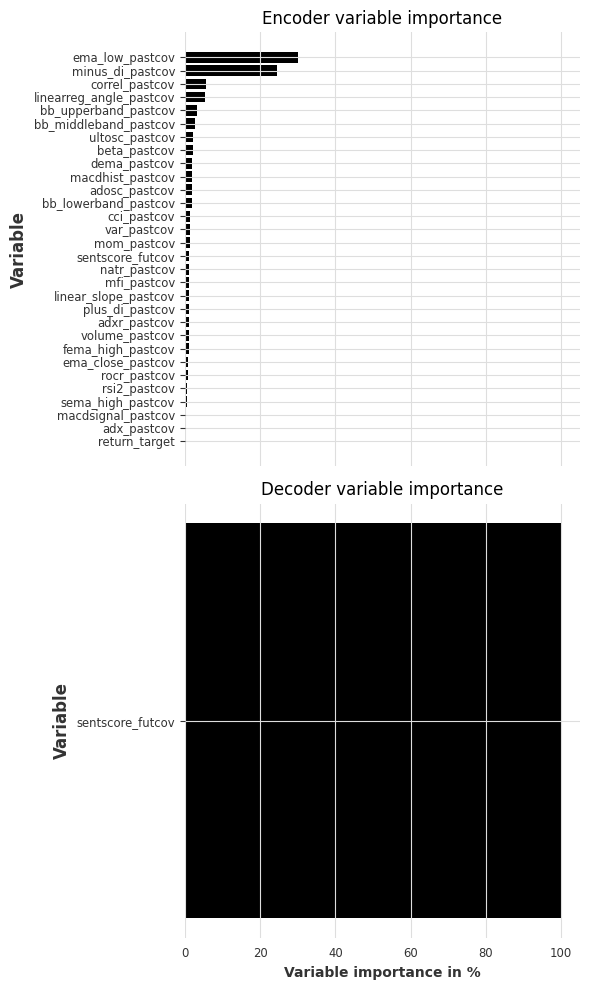

In [120]:
explainer.plot_variable_selection(explainability_result,fig_size=(6,10))

In [121]:
tsla_price_data_with_fea_selection = tsla_price_data_with_fea_ts[['correl','linearreg_angle','ema_low',
                                                                  'minus_di','bb_middleband','ultosc',
                                                                  'bb_upperband','beta','cci','macdhist','mom',
                                                                  'bb_lowerband','adosc','sentscore','return']]

In [122]:
tsla_price_data_with_fea_selection.to_csv('data/prepared/tsla_feature_data.csv')

In [124]:
tsla_price_data_with_fea_selection.pd_dataframe().shape

(3631, 15)

## Look at predictions on the validation set

In [125]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [126]:
from tqdm import tqdm_notebook as tqdm

In [127]:
# before starting, we define some constants
num_samples = 200

figsize = (9, 6)
lowest_q, low_q, high_q, highest_q = 0.01, 0.1, 0.9, 0.99
label_q_outer = f"{int(lowest_q * 100)}-{int(highest_q * 100)}th percentiles"
label_q_inner = f"{int(low_q * 100)}-{int(high_q * 100)}th percentiles"

In [128]:
def eval_model(model, n, actual_series, val_series):
    pred_series = model.predict(n=n, num_samples=num_samples)

    # plot actual series
    plt.figure(figsize=figsize)
    actual_series[: pred_series.end_time()].plot(label="actual")

    # plot prediction with quantile ranges
    pred_series.plot(
        low_quantile=lowest_q, high_quantile=highest_q, label=label_q_outer
    )
    pred_series.plot(low_quantile=low_q, high_quantile=high_q, label=label_q_inner)

    plt.title("MAPE: {:.2f}%".format(mape(val_series, pred_series)))
    plt.legend()

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  0.73it/s]


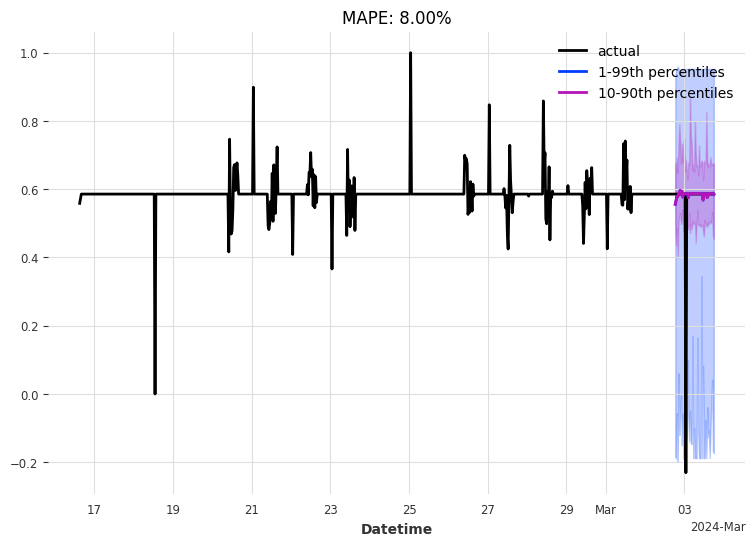

In [129]:
eval_model(my_model, 48, series_transformed, val_transformed)

In [64]:
# from sklearn.linear_model import BayesianRidge

# from darts.models import (
#     LinearRegressionModel,
#     RegressionModel,
#     LightGBMModel,
#     XGBModel,
#     CatBoostModel,
# )
# from darts.metrics import mape
# from darts.datasets import ElectricityConsumptionZurichDataset
# from darts.explainability import ShapExplainer

In [66]:
# model = XGBModel(
#     lags=24,
#     lags_past_covariates=24,
#     lags_future_covariates=[24],
#     output_chunk_length=forecast_horizon, 
#     likelihood="quantile", quantiles=[0.05, 0.5, 0.95]
# )

# model.fit(train_transformed,
#           past_covariates=past_covariates_transformed,
#           future_covariates=future_covariates_transformed)

# #model.fit(series_transformed,past_covariates=past_covariates_transformed)

# pred_samples = model.predict(n=24, 
#                              #series=val_transformed,
#                              past_covariates=past_covariates_transformed,
#                              future_covariates=future_covariates_transformed,
#                              num_samples=200)
# pred_params = model.predict(n=1, 
#                             #series=val_transformed, 
#                             past_covariates=past_covariates_transformed,
#                             future_covariates=future_covariates_transformed,
#                             num_samples=1, 
#                             predict_likelihood_parameters=True)

# for val, comp in zip(pred_params.values()[0], pred_params.components):
#     print(f"{comp} : {round(val, 3)}")

# train_transformed[-48:].plot(label="training")
# val_transformed[:24].plot(label="validation")
# pred_samples.plot(label="forecasts")
# plt.tight_layout()

In [67]:
# shap_explainer = ShapExplainer(model=model)
# shap_values = shap_explainer.summary_plot()

In [68]:
# model.historical_forecasts(series=val_transformed,
#                            past_covariates=past_covariates_transformed,
#                            future_covariates=future_covariates_transformed)